# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

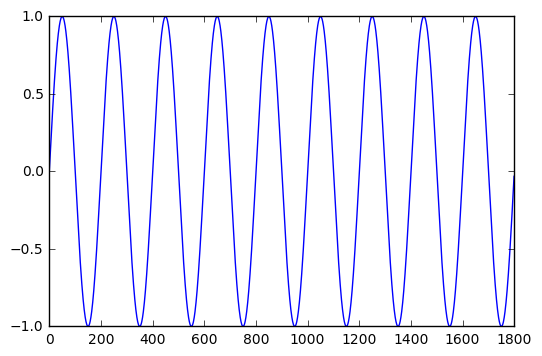

In [3]:
x = np.arange(1,10,0.005)
y = np.sin(2*np.pi*1*x)
plt.plot(y)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

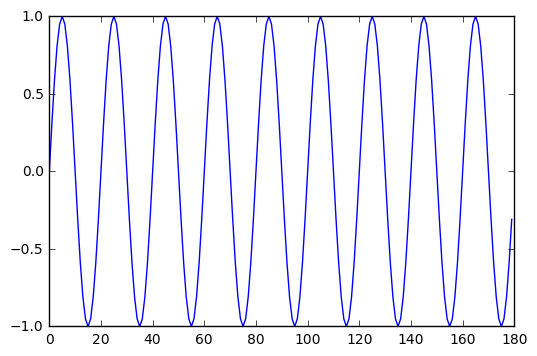

In [4]:
fs=20
n = np.arange(1,10,1./fs)
y = np.sin(2*np.pi*n)
plt.plot(y)

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

In [5]:
def step(n=0, N=20):
    if (n > N-1): 
        raise ValueError('n is out of range')
    s = np.zeros((N, ))
    s[n:N] = 1 
    
    return s
xmin = -10
length = 20

x = step(xmin,length)
print x
y = []

for i in range(0,len(x)-1):
        y.append((x[i]+x[i+1])/2) 

        
print y

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


**1.2** Propose a modification to obtain a causal version

<Container object of 3 artists>

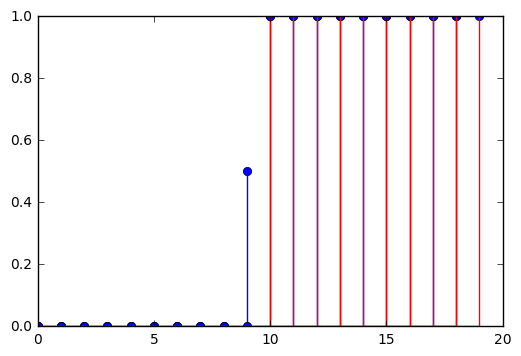

In [6]:
plt.stem(y)
plt.stem(x, 'r')
#the system is not causal because it depends on future signal sequences. 
#if we want it to be causal we have to eliminate the dependence on x[k+1] and put something else, f.e x[k-1]

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [7]:
def prim(f):
    x
    curr_sum = 0
    for i in range(0,len(f)):
             curr_sum += f[i]
             x[i] = curr_sum
    return x   
    
def dirac(n=0, N=20):
    if n > N-1: raise ValueError('n is out of range')
    s = np.zeros((N, ))
    s[n] = 1
    return s

<Container object of 3 artists>

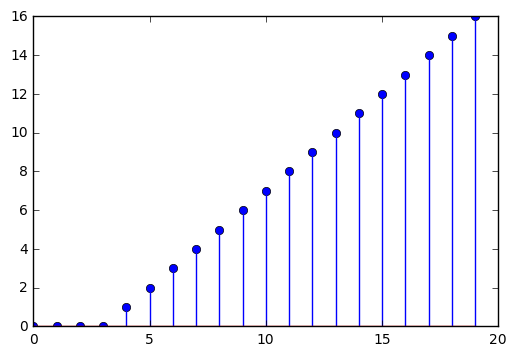

In [8]:
st = step(4,20)
res = prim(st)
plt.stem(res)

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

<Container object of 3 artists>

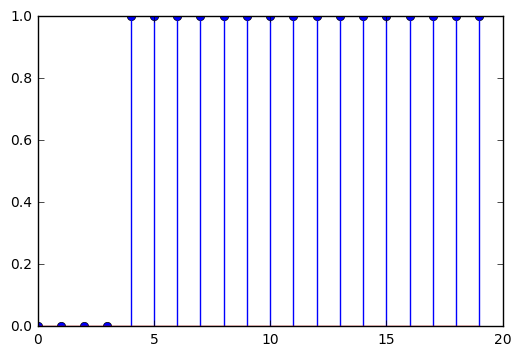

In [9]:
dirc = dirac(4,20)
resdirc = prim(dirc)
plt.stem(resdirc)

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[1, 3, 8, 19, 42, 89, 184, 375, 758, 1525, 3060, 6131, 12274, 24561, 49136, 98287, 196590, 393197, 786412, 1572843]


<Container object of 3 artists>

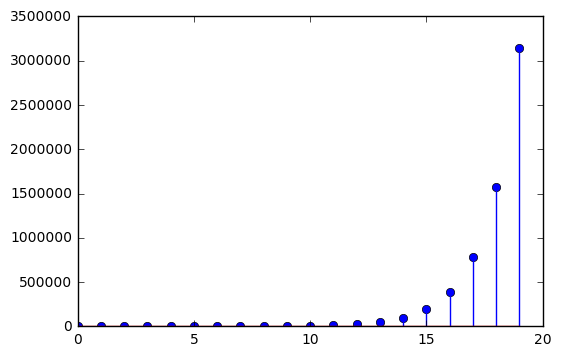

In [10]:
y = [1]
x = np.arange(0,20,1)
for i in range(1,len(x)):
        if(len(y)>0):
            y.append(x[i] + 2*y[i-1]) 
print x
print y
ddc = prim(y)
plt.stem(ddc)
# it would be stable if the accumulative function had a constant limit on n -> infinity, but
# this one doesn't have the limit and it is constantly growing

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[1, 0.0, 0.0, 0.0, 1.0, 0.33333333333333331, 0.1111111111111111, 0.037037037037037035, 0.012345679012345678, 0.0041152263374485592, 0.0013717421124828531, 0.00045724737082761773, 0.00015241579027587258, 5.0805263425290864e-05, 1.6935087808430289e-05, 5.645029269476763e-06, 1.881676423158921e-06, 6.2722547438630704e-07, 2.0907515812876902e-07, 6.9691719376256336e-08]


<Container object of 3 artists>

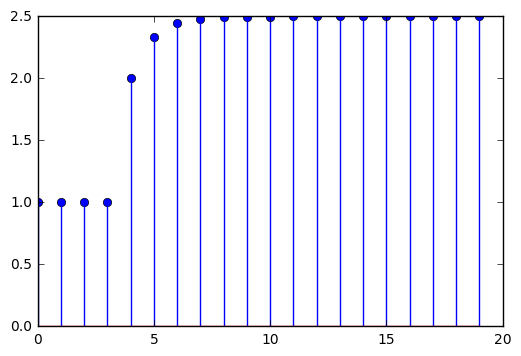

In [11]:
y = [1]
dirc = dirac(4,20)
#x = np.arange(0,20,1)
x=dirc
for i in range(1,len(x)):
        if(len(y)>0):
            y.append(x[i] + y[i-1]/3) 
print x
print y
ddc = prim(y)
plt.stem(ddc)



#this func is stable because we can clearly see the limit for it on value 2.5

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


<Container object of 3 artists>

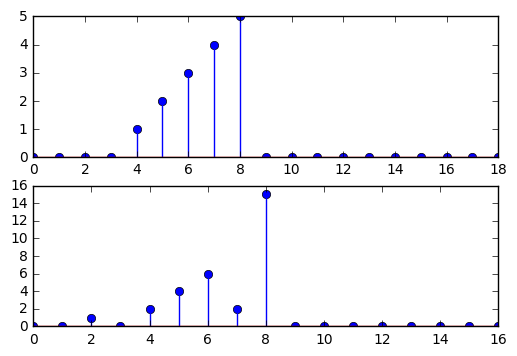

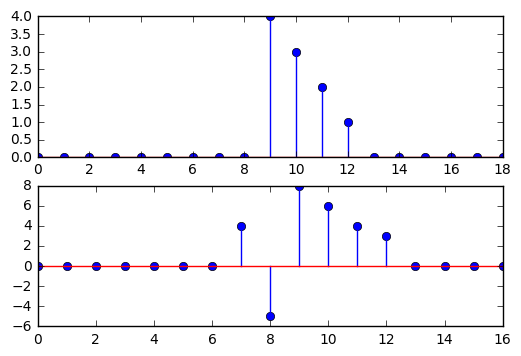

In [14]:
x_a=np.array([0,0,0,0,1,2,3,4,5,0,0,0,0,0,0,0,0,0,0])
x_b=np.array([0,0,0,0,0,0,0,0,0,4,3,2,1,0,0,0,0,0,0])

def sequenceInvLin(x):
    y = x.copy();
    for k in range(1,y.size-1):
        y[k] = 3*x[k-1] - 2*x[k] + x[k+1]
    return y[1:-1]

y_a = sequenceInvLin(x_a)
y_b = sequenceInvLin(x_b)

plt.figure()
plt.subplot(2,1,1)

plt.stem(x_a)
plt.subplot(2,1,2)

plt.stem(y_a)

plt.figure()
plt.subplot(2,1,1)

plt.stem(x_b)
plt.subplot(2,1,2)

plt.stem(y_b)

**3.2** Prove the system defined by the previous equation is linear (and invariant).


<Container object of 3 artists>

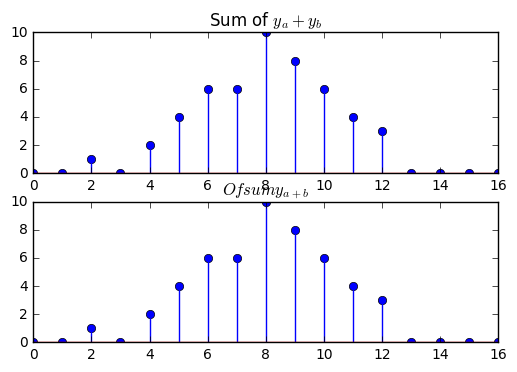

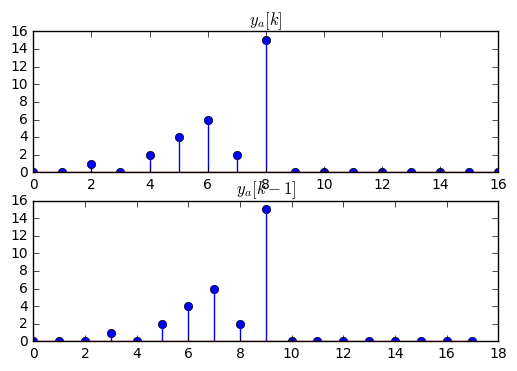

In [23]:
y_ab = sequenceInvLin(x_a + x_b)
#To prove linearity we check if it is a linear combination of y_a and y_b

plt.figure()
plt.subplot(2,1,1)
plt.title("Sum of $y_a + y_b$")
plt.stem(y_a + y_b)
plt.subplot(2,1,2)
plt.title("$Of sum y_{a+b}$")
plt.stem(y_ab)

# In this case we can very clearly see system31() is linear since y_ab = y_a + y_b 

# To check its invariance, compare the output of x_a(k) and x_a(k-1)
y_a5 = sequenceInvLin(np.append(np.zeros(1), x_a) )
plt.figure()
plt.subplot(2,1,1)
plt.title("$y_a[k]$")
plt.stem(y_a)
plt.subplot(2,1,2)
plt.title("$y_a[k-1]$")
plt.stem(y_a5)



**3.3** Propose a nonlinear/noninvariant system.

<Container object of 3 artists>

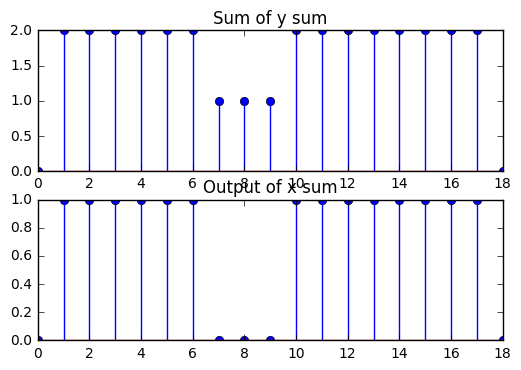

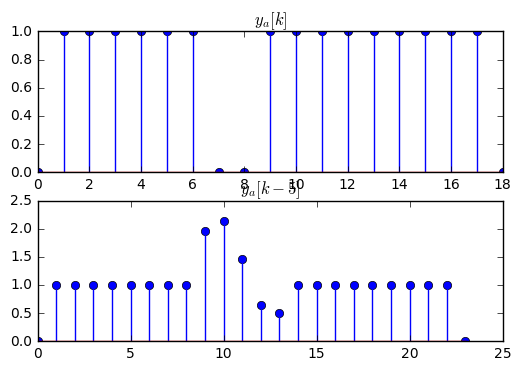

In [26]:
def is_nonlinear_variant(x):
    y = x.copy();
    
    for k in range(1,y.size-1):
        y[k] = np.exp(x[k]/k)+np.sin(x[k])

    return y


y_nlv_a = is_nonlinear_variant(x_a)
y_nlv_b = is_nonlinear_variant(x_b)
y_nlv_ab = is_nonlinear_variant((x_a + x_b))

plt.figure()
plt.subplot(2,1,1)
plt.title('Sum of y sum')

plt.stem(y_nlv_a + y_nlv_b)
plt.subplot(2,1,2)

plt.title("Output of x sum")
plt.stem(y_nlv_ab)




y_nlv_a5 = is_nonlinear_variant(np.append(np.zeros(1), x_a))

plt.figure()

plt.subplot(2,1,1)
plt.title("$y_a[k]$")
plt.stem(y_nlv_a)
plt.subplot(2,1,2)
plt.title("$y_a[k-1]$")
plt.stem(y_nlv_a5)

# The function is not time invariant as the values clearly change